In [1]:
import pandas as pd
import numpy as np 
from tqdm import tqdm 
from kf import QinKalmanFilter
import matplotlib.pyplot as plt 

%load_ext autoreload
%autoreload 2

In [2]:
qout = pd.read_parquet("data/raw_data_outflow.par").set_index("time")
h = pd.read_parquet("data/raw_data_level.par").set_index("time")
data = qout.join(h)
data = data.resample("1min").mean().dropna()

In [3]:
Tsim = 2000
R = 0.01
dt = 1
a = 20 
x_init = np.array([153, 0])

P_init = np.array([[1.0, 0.0],
                [0.0, 1.0]])

Q = np.array([[0.1, 0.0],
                [0.0, 0.5]])

A = np.array([[1, dt/a],
                [0, 1]])
B = np.array([[-dt/a],
                [0]])
H = np.array([[1, 0]])

In [6]:
kf_qin = QinKalmanFilter(dt = 1, 
                        a = 20, 
                        x_init=x_init, 
                        A = A, 
                        B = B, 
                        H = H, 
                        C = None, 
                        P_init = P_init, 
                        Q = Q, 
                        R = R)

In [8]:
h_est = np.zeros(Tsim)  
qin_est = np.zeros(Tsim) 
x = np.array([data["level"].iloc[0], 0.0])  # Initial state [h, qin]

for t in tqdm(range(Tsim)):

    h_meas = float(data["level"].iloc[t])  
    qout = float(data["outflow"].iloc[t])      
    
    x, P = kf_qin.step(h_meas, qout)
    h_est[t], qin_est[t]  = x[0], x[1] 

100%|██████████| 2000/2000 [00:00<00:00, 26138.44it/s]


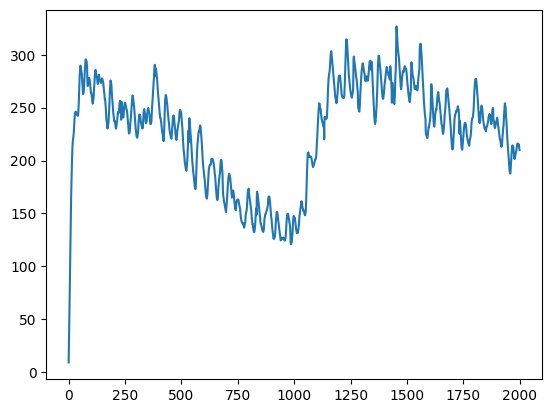

In [9]:
plt.plot(qin_est)

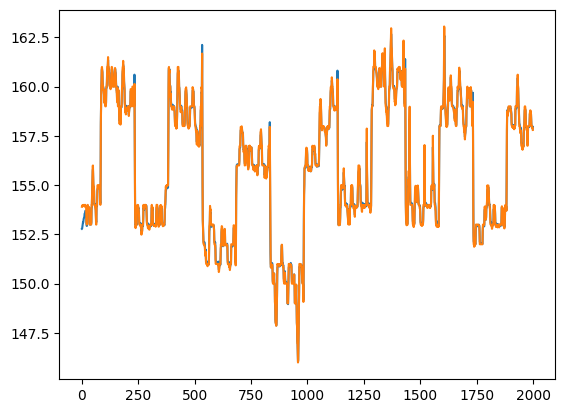

In [10]:
plt.plot(h_est)
plt.plot(data["level"][:Tsim].values)